# Devices Price Classification System

Build a Devices Price Classification System (AI System) using Python and SpringBoot

# Python project

Allow you to predict the prices, and to classify the device's prices according to their characteristics

In [462]:
import pandas as pd
import numpy as np
import decimal
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from IPython.display import display
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV,KFold
from sklearn.metrics import mutual_info_score,accuracy_score,roc_curve,auc,roc_auc_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [40]:
def Convert_Num_To_Cat(df,numerical_list):
    for col in numerical_list:
        df[col] = (df[col] == 1).astype(str)
    return df

In [44]:
def Create_Categorial_Numerical_Lists(df):
    categorial_list=[]
    numerical_list=[]
    # for loop over column in df 
    for element in df:
    #check if type of column is category      
        if((df[element].dtype)=='object') :
            categorial_list.append(element)
        else:    
            numerical_list.append(element)
            
    print('categorial_list')
    print(categorial_list)
    print('numerical_list')            
    print(numerical_list)
    return categorial_list,numerical_list 

In [137]:
def Risk_Ratio_Group_VS_Global(df,categorial,global_rate):
# iterate over all categorical variables
    for element in categorial:
# aggregate data into one value per group which is the 'rate' value
        df_RR = df.groupby(by=element).price_range.agg(['mean'])
# create column for diff value between element variable and Target ^^ to see the diff        
        df_RR['diff'] = round(abs(df_RR['mean'] - global_rate),3)    
# create column for risk ratio       
        df_RR['risk'] = round(df_RR['mean']/global_rate , 3)
# render a dataframe inside the loop
        display(df_RR)
    return    

In [143]:
def calculate_MI(categorical_element):
# for each categorical element of the df calculate MI
    return mutual_info_score(categorical_element,df_train.price_range)

In [144]:
def Mutual_Information(df,categorial):
# select categorical element from df and apply 'calculate_MI' for each column that selected  
    df_MI = df[categorial].apply(calculate_MI)
# sort the MI from large to smalll values and convert it to dataframe in column called "Mu_Info"    
    df_MI = df_MI.sort_values(ascending=False).to_frame(name='Mu_Info')
    return df_MI

In [388]:
# Handle Categorical Variables
def Handle_Categorical_Variables(df,categorical,numerical):
# convert df to dictionary
    df_dict = df[numerical+categorical].to_dict(orient='row')
# create DictVectorizer that takes a dictionary and vectorizes    
    dv=DictVectorizer(sparse=False)
# apply the one-hot encoding to features that are categorical and left the features that are numerical
    dv.fit(df_dict)
# convert the dictionaries to a matrix
    df_mat = dv.transform(df_dict)
    return dv,df_mat

# 1.Data Preparing

Prepare the data                                                                                                               
Do some engineering processing                                                                                                 
Do Exploratory Data Analysis                                                                                                   
Make charts for dataset to facilitate the discovery of patterns, insights, and correlations. 

In [20]:
# read the data
df_train = pd.read_csv('dataset/train.csv')
df_test = pd.read_csv('dataset/test.csv')

In [21]:
# show the number of row and col
df_train.shape

(2000, 21)

In [22]:
# show some data
df_train.head().T

,0,1,2,3,4
battery_power,842.0,1021.0,563.0,615.0,1821.0
blue,0.0,1.0,1.0,1.0,1.0
clock_speed,2.2,0.5,0.5,2.5,1.2
dual_sim,0.0,1.0,1.0,0.0,0.0
fc,1.0,0.0,2.0,0.0,13.0
four_g,0.0,1.0,1.0,0.0,1.0
int_memory,7.0,53.0,41.0,10.0,44.0
m_dep,0.6,0.7,0.9,0.8,0.6
mobile_wt,188.0,136.0,145.0,131.0,141.0
n_cores,2.0,3.0,5.0,6.0,2.0


In [23]:
# Dataset columns are as follows:
# ■ id - ID
# ■ battery_power - Total energy a battery can store in one time measured in mAh
# ■ blue - Has Bluetooth or not
# ■ clock_speed - The speed at which the microprocessor executes instructions
# ■ dual_sim - Has dual sim support or not
# ■ fc - Front Camera megapixels
# ■ four_g - Has 4G or not
# ■ int_memory - Internal Memory in Gigabytes
# ■ m_dep - Mobile Depth in cm
# ■ mobile_wt - Weight of mobile phone
# ■ n_cores - Number of cores of the processor
# ■ pc - Primary Camera megapixels
# ■ px_height - Pixel Resolution Height
# ■ px_width - Pixel Resolution Width
# ■ ram - Random Access Memory in Megabytes
# ■ sc_h - Screen Height of mobile in cm
# ■ sc_w - Screen Width of mobile in cm
# ■ talk_time - longest time that a single battery charge will last when you are
# ■ three_g - Has 3G or not
# ■ touch_screen - Has touch screen or not
# ■ wifi - Has wifi or not
# ■ price_range - This is the target variable with the value of:
    # ● 0 (low cost)
    # ● 1 (medium cost)
    # ● 2 (high cost)
    # ● 3 (very high cost)

In [24]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             1995 non-null   float64
 5   four_g         1995 non-null   float64
 6   int_memory     1995 non-null   float64
 7   m_dep          1995 non-null   float64
 8   mobile_wt      1996 non-null   float64
 9   n_cores        1996 non-null   float64
 10  pc             1995 non-null   float64
 11  px_height      1996 non-null   float64
 12  px_width       1998 non-null   float64
 13  ram            1998 non-null   float64
 14  sc_h           1999 non-null   float64
 15  sc_w           1999 non-null   float64
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

blue ,dual_sim ,four_g ,n_cores[1-8],three_g ,touch_screen ,wifi => convert these variables to categorical

In [26]:
#convert from numerical to categorical variable
numerical_list=['blue','dual_sim','four_g','three_g','touch_screen','wifi']
Convert_Num_To_Cat(df_train,numerical_list)

#convert from float to categorical variable
df_train['n_cores'] = df_train['n_cores'].replace({1.0:'One',2.0:'Two',3.0:'Three',4.0:'Four',
                                                   5.0:'Five',6.0:'Six',7.0:'Seven',8.0:'Eight'})

In [27]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   object 
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   object 
 4   fc             1995 non-null   float64
 5   four_g         2000 non-null   object 
 6   int_memory     1995 non-null   float64
 7   m_dep          1995 non-null   float64
 8   mobile_wt      1996 non-null   float64
 9   n_cores        1996 non-null   object 
 10  pc             1995 non-null   float64
 11  px_height      1996 non-null   float64
 12  px_width       1998 non-null   float64
 13  ram            1998 non-null   float64
 14  sc_h           1999 non-null   float64
 15  sc_w           1999 non-null   float64
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   object 
 18  touch_sc

In [29]:
df_train.head().T

,0,1,2,3,4
battery_power,842,1021,563,615,1821
blue,False,True,True,True,True
clock_speed,2.2,0.5,0.5,2.5,1.2
dual_sim,False,True,True,False,False
fc,1,0,2,0,13
four_g,False,True,True,False,True
int_memory,7,53,41,10,44
m_dep,0.6,0.7,0.9,0.8,0.6
mobile_wt,188,136,145,131,141
n_cores,Two,Three,Five,Six,Two


In [30]:
# check null value
df_train.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               5
four_g           0
int_memory       5
m_dep            5
mobile_wt        4
n_cores          4
pc               5
px_height        4
px_width         2
ram              2
sc_h             1
sc_w             1
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [36]:
# fill the null value with the mean
df_train = df_train.fillna(df_train.mean())

# fill the null value of n_cores with 'Four'
df_train.n_cores = df_train.n_cores.fillna('Four')

# check the null value
df_train.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [37]:
df_train.describe()

,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,price_range
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,1.522250,4.310276,32.048120,0.502256,140.266533,9.915789,644.651804,1251.287788,2124.262262,12.303652,5.766383,11.011000,1.500000
std,439.418206,0.816004,4.330340,18.123767,0.288169,35.349256,6.050887,442.911643,432.136592,1084.730328,4.211319,4.356310,5.463955,1.118314
min,501.000000,0.500000,0.000000,2.000000,0.100000,80.000000,0.000000,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000
25%,851.750000,0.700000,1.000000,16.000000,0.200000,109.000000,5.000000,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,0.750000
50%,1226.000000,1.500000,3.000000,32.000000,0.500000,141.000000,10.000000,568.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.500000
75%,1615.250000,2.200000,7.000000,48.000000,0.800000,170.000000,15.000000,946.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,2.250000
max,1998.000000,3.000000,19.000000,64.000000,1.000000,200.000000,20.000000,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,3.000000


Analyze target [price_range] value

In [38]:
# count [price_range] value
df_train.price_range.value_counts()

3    500
2    500
1    500
0    500
Name: price_range, dtype: int64

([<matplotlib.patches.Wedge at 0xd80d0c8>,
 [Text(0.7778174593052024, 0.7778174593052024, 'low'),
  Text(-0.7778174593052023, 0.7778174593052024, 'medium'),
  Text(-0.7778174593052025, -0.7778174593052023, 'high'),
  Text(0.7778174593052022, -0.7778174593052025, 'very high')],
 [Text(0.4242640687119285, 0.4242640687119285, '25.0%'),
  Text(-0.42426406871192845, 0.4242640687119285, '25.0%'),
  Text(-0.4242640687119286, -0.42426406871192845, '25.0%'),
  Text(0.4242640687119284, -0.4242640687119286, '25.0%')])

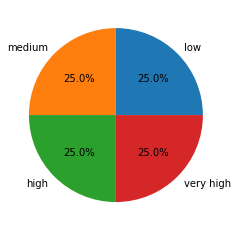

In [113]:
#  plot the price_range 
plt.pie(df_train.price_range.value_counts(), labels = ['low','medium','high','very high'],autopct= '%1.1f%%')
# df_train['price_range'].value_counts().plot(kind='bar')


The target value is balance

Splitting Categorical and Numerical Variables

In [88]:
categorical,numerical  = Create_Categorial_Numerical_Lists(df_train)

categorial_list
['blue', 'dual_sim', 'four_g', 'n_cores', 'three_g', 'touch_screen', 'wifi']
numerical_list
['battery_power', 'clock_speed', 'fc', 'int_memory', 'm_dep', 'mobile_wt', 'pc', 'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'price_range']


In [89]:
numerical.remove('price_range')

Analyze categorical variables

In [90]:
# how many unique values each variable has
df_train[categorical].nunique()

blue            2
dual_sim        2
four_g          2
n_cores         8
three_g         2
touch_screen    2
wifi            2
dtype: int64

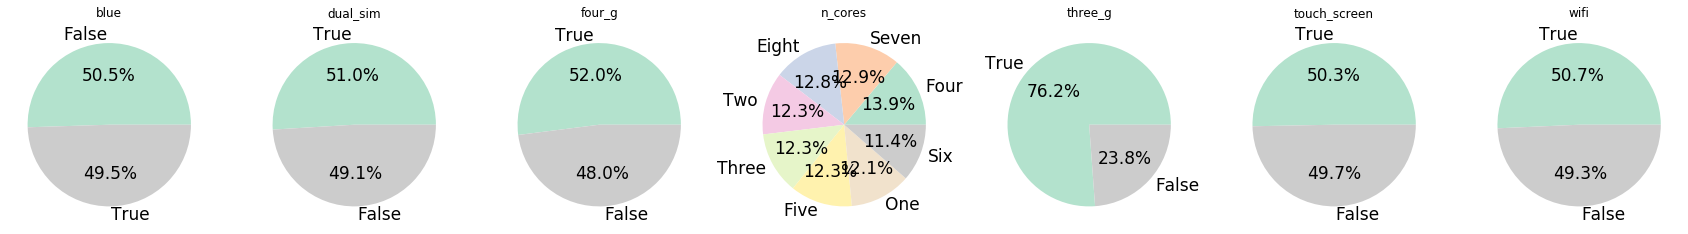

In [136]:
# relation between the categorical variables
for i, col in enumerate(categorical):
    plt.subplot(1,7, i+1)
    df_train[col].value_counts().plot(kind='pie',fontsize=17,figsize=(30,20),colormap='Pastel2',autopct='%1.1f%%').set_title(col)
    plt.axis('off')
plt.show()

The categorical variables is balance and has no outliers

Feature Importance Analysis For Categorial List

RISK RATIO:

it is the ratio between probabilities in different groups, where risk refers to the risk of having the effect.

In [139]:
global_rate = round(df_train.price_range.mean(),3)
print(global_rate)
Risk_Ratio_Group_VS_Global(df_train,categorical,global_rate)

1.5


,mean,diff,risk
blue,,,
False,1.477228,0.023,0.985
True,1.523232,0.023,1.015


,mean,diff,risk
dual_sim,,,
False,1.480122,0.020,0.987
True,1.519136,0.019,1.013


,mean,diff,risk
four_g,,,
False,1.482292,0.018,0.988
True,1.516346,0.016,1.011


,mean,diff,risk
n_cores,,,
Eight,1.472656,0.027,0.982
Five,1.597561,0.098,1.065
Four,1.444043,0.056,0.963
One,1.549587,0.050,1.033
Seven,1.546512,0.047,1.031
Six,1.486842,0.013,0.991
Three,1.455285,0.045,0.970
Two,1.453441,0.047,0.969


,mean,diff,risk
three_g,,,
False,1.452830,0.047,0.969
True,1.514773,0.015,1.010


,mean,diff,risk
touch_screen,,,
False,1.534205,0.034,1.023
True,1.466203,0.034,0.977


,mean,diff,risk
wifi,,,
False,1.478702,0.021,0.986
True,1.520710,0.021,1.014


In [145]:
MI=Mutual_Information(df_train,categorical)
MI

,Mu_Info
n_cores,0.005157
touch_screen,0.000970
four_g,0.000742
blue,0.000358
three_g,0.000343
dual_sim,0.000322
wifi,0.000214


Create new categorical features from categorical variables

In [255]:
df= df_train.copy()

In [256]:
df['n_cores_touch_screen']=df['n_cores']+'_'+df['touch_screen']
df['n_cores_four_g']=df['n_cores']+'_'+df['four_g']
df['n_cores_blue']=df['n_cores']+'_'+df['blue']
df['n_cores_three_g']=df['n_cores']+'_'+df['three_g']

df['touch_screen_four_g']=df['touch_screen']+'_'+df['four_g']
df['touch_screen_blue']=df['touch_screen']+'_'+df['blue']
df['touch_screen_three_g']=df['touch_screen']+'_'+df['three_g']

df['four_g_blue']=df['four_g']+'_'+df['blue']
df['four_g_three_g']=df['four_g']+'_'+df['three_g']

df['blue_three_g']=df['blue']+'_'+df['three_g']


In [257]:
df.head().T

,0,1,2,3,4
battery_power,842,1021,563,615,1821
blue,False,True,True,True,True
clock_speed,2.2,0.5,0.5,2.5,1.2
dual_sim,False,True,True,False,False
fc,1,0,2,0,13
four_g,False,True,True,False,True
int_memory,7,53,41,10,44
m_dep,0.6,0.7,0.9,0.8,0.6
mobile_wt,188,136,145,131,141
n_cores,Two,Three,Five,Six,Two


In [258]:
categorical_new = ['n_cores_touch_screen','n_cores_four_g','n_cores_blue','n_cores_three_g',
                   'touch_screen_four_g','touch_screen_blue','touch_screen_three_g',
                   'four_g_blue','four_g_three_g',
                   'blue_three_g'
                  ]

In [259]:
df[categorical_new].nunique()

n_cores_touch_screen    16
n_cores_four_g          16
n_cores_blue            16
n_cores_three_g         16
touch_screen_four_g      4
touch_screen_blue        4
touch_screen_three_g     4
four_g_blue              4
four_g_three_g           3
blue_three_g             4
dtype: int64

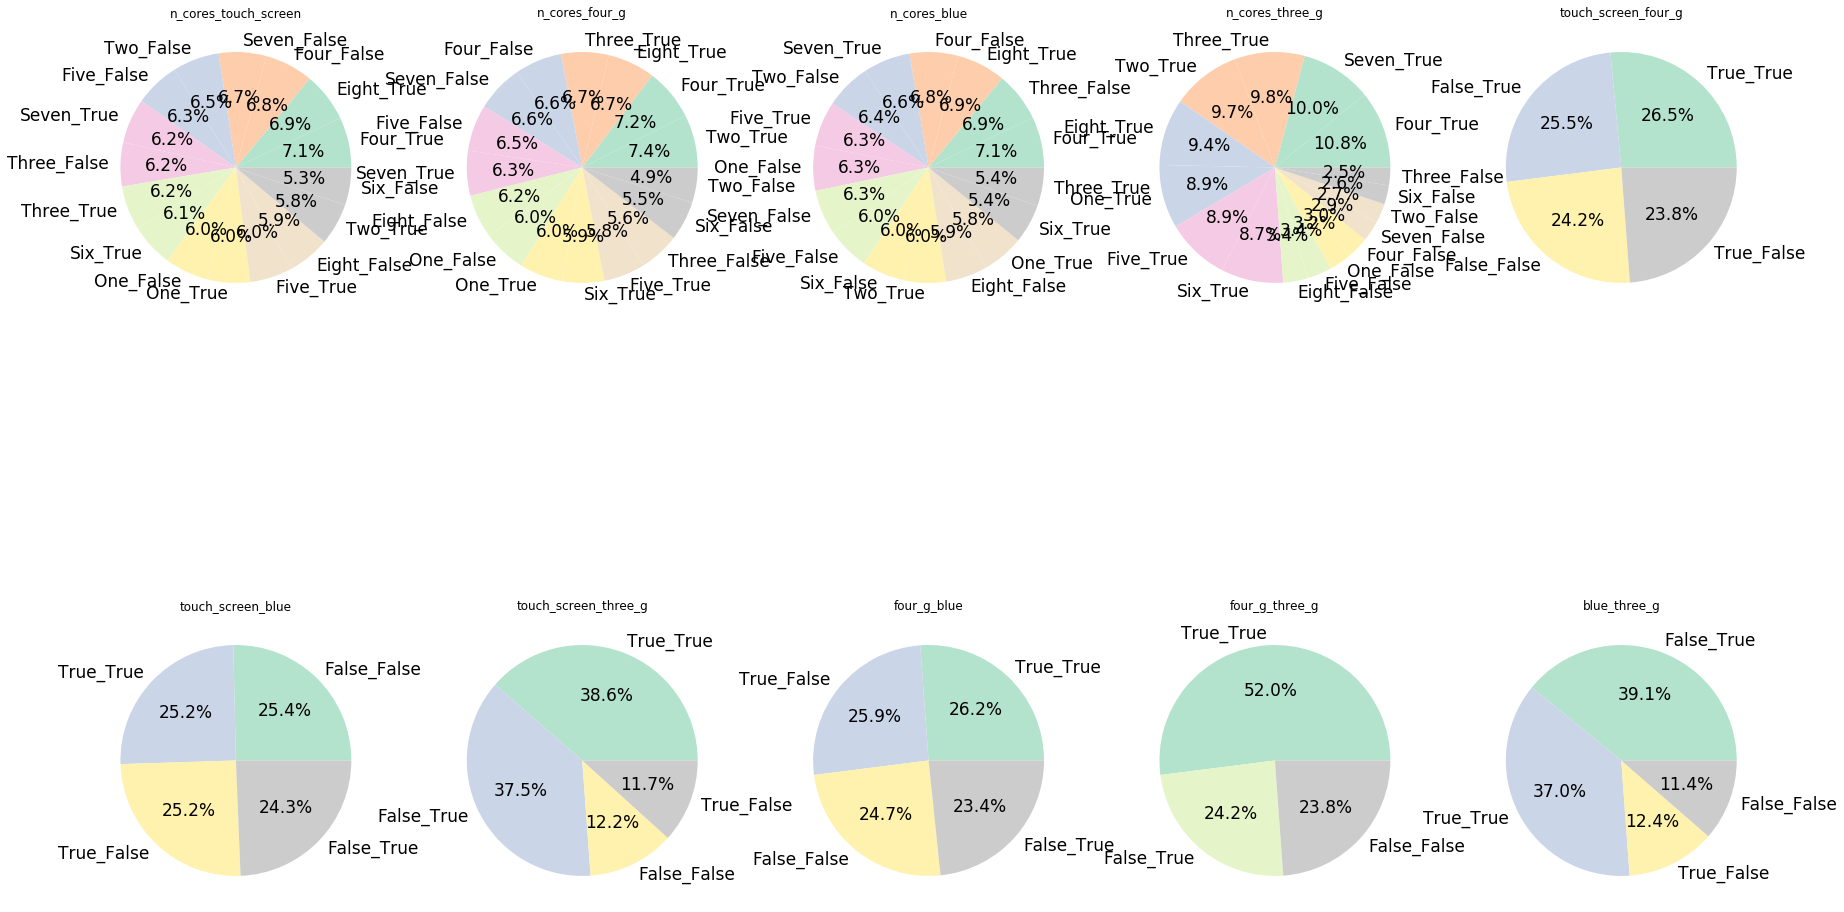

In [260]:
# relation between the categorical variables
for i, col in enumerate(categorical_new):
    plt.subplot(2,5, i+1)
    df[col].value_counts().plot(kind='pie',fontsize=17,figsize=(30,20),colormap='Pastel2',autopct='%1.1f%%').set_title(col)
    plt.axis('off')
plt.show()

In [261]:
global_rate = round(df.price_range.mean(),3)
print(global_rate)
Risk_Ratio_Group_VS_Global(df,categorical_new,global_rate)

1.5


,mean,diff,risk
n_cores_touch_screen,,,
Eight_False,1.593220,0.093,1.062
Eight_True,1.369565,0.130,0.913
Five_False,1.619048,0.119,1.079
Five_True,1.575000,0.075,1.050
Four_False,1.573529,0.074,1.049
Four_True,1.319149,0.181,0.879
One_False,1.487603,0.012,0.992
One_True,1.611570,0.112,1.074
Seven_False,1.518797,0.019,1.013


,mean,diff,risk
n_cores_four_g,,,
Eight_False,1.365854,0.134,0.911
Eight_True,1.571429,0.071,1.048
Five_False,1.669231,0.169,1.113
Five_True,1.517241,0.017,1.011
Four_False,1.416667,0.083,0.944
Four_True,1.468966,0.031,0.979
One_False,1.495868,0.004,0.997
One_True,1.603306,0.103,1.069
Seven_False,1.454545,0.045,0.970


,mean,diff,risk
n_cores_blue,,,
Eight_False,1.533898,0.034,1.023
Eight_True,1.420290,0.080,0.947
Five_False,1.666667,0.167,1.111
Five_True,1.531746,0.032,1.021
Four_False,1.414815,0.085,0.943
Four_True,1.471831,0.028,0.981
One_False,1.373016,0.127,0.915
One_True,1.741379,0.241,1.161
Seven_False,1.460317,0.040,0.974


,mean,diff,risk
n_cores_three_g,,,
Eight_False,1.405797,0.094,0.937
Eight_True,1.497326,0.003,0.998
Five_False,1.652174,0.152,1.101
Five_True,1.576271,0.076,1.051
Four_False,1.383333,0.117,0.922
Four_True,1.460829,0.039,0.974
One_False,1.343750,0.156,0.896
One_True,1.623596,0.124,1.082
Seven_False,1.500000,0.000,1.000


,mean,diff,risk
touch_screen_four_g,,,
False_False,1.518595,0.019,1.012
False_True,1.549020,0.049,1.033
True_False,1.445378,0.055,0.964
True_True,1.484906,0.015,0.990


,mean,diff,risk
touch_screen_blue,,,
False_False,1.514793,0.015,1.010
False_True,1.554415,0.054,1.036
True_False,1.439364,0.061,0.960
True_True,1.493042,0.007,0.995


,mean,diff,risk
touch_screen_three_g,,,
False_False,1.506173,0.006,1.004
False_True,1.543276,0.043,1.029
True_False,1.397436,0.103,0.932
True_True,1.487047,0.013,0.991


,mean,diff,risk
four_g_blue,,,
False_False,1.478702,0.021,0.986
False_True,1.486081,0.014,0.991
True_False,1.475822,0.024,0.984
True_True,1.556405,0.056,1.038


,mean,diff,risk
four_g_three_g,,,
False_False,1.452830,0.047,0.969
False_True,1.511387,0.011,1.008
True_True,1.516346,0.016,1.011


,mean,diff,risk
blue_three_g,,,
False_False,1.421053,0.079,0.947
False_True,1.493606,0.006,0.996
True_False,1.481928,0.018,0.988
True_True,1.537112,0.037,1.025


In [262]:
MI=Mutual_Information(df,categorical_new)
MI

,Mu_Info
n_cores_blue,0.013182
n_cores_touch_screen,0.011823
n_cores_four_g,0.011196
n_cores_three_g,0.009949
touch_screen_four_g,0.002728
touch_screen_blue,0.002269
four_g_blue,0.001957
four_g_three_g,0.001647
touch_screen_three_g,0.001591
blue_three_g,0.000734


In [193]:
remove_list=['blue', 'dual_sim', 'four_g', 'n_cores', 'three_g', 'touch_screen', 'wifi',
             'touch_screen_four_g','touch_screen_blue','touch_screen_three_g',
              'four_g_blue','four_g_three_g','blue_three_g']

In [263]:
del categorical_new[4:10]

In [264]:
categorical_new

['n_cores_touch_screen', 'n_cores_four_g', 'n_cores_blue', 'n_cores_three_g']

In [194]:
df.drop(columns=remove_list, inplace=True)

In [265]:
df.head().T

,0,1,2,3,4
battery_power,842,1021,563,615,1821
blue,False,True,True,True,True
clock_speed,2.2,0.5,0.5,2.5,1.2
dual_sim,False,True,True,False,False
fc,1,0,2,0,13
four_g,False,True,True,False,True
int_memory,7,53,41,10,44
m_dep,0.6,0.7,0.9,0.8,0.6
mobile_wt,188,136,145,131,141
n_cores,Two,Three,Five,Six,Two


Analyze numerical variables

In [266]:
# measure the dependency between a numerical variable and target variable
Corr_Coff=df[numerical].corrwith(df.price_range).to_frame(name='correlation')
Corr_Coff

,correlation
battery_power,0.200723
clock_speed,-0.006606
fc,0.024963
int_memory,0.042527
m_dep,-0.000083
mobile_wt,-0.032424
pc,0.034589
px_height,0.148095
px_width,0.166077
ram,0.917027


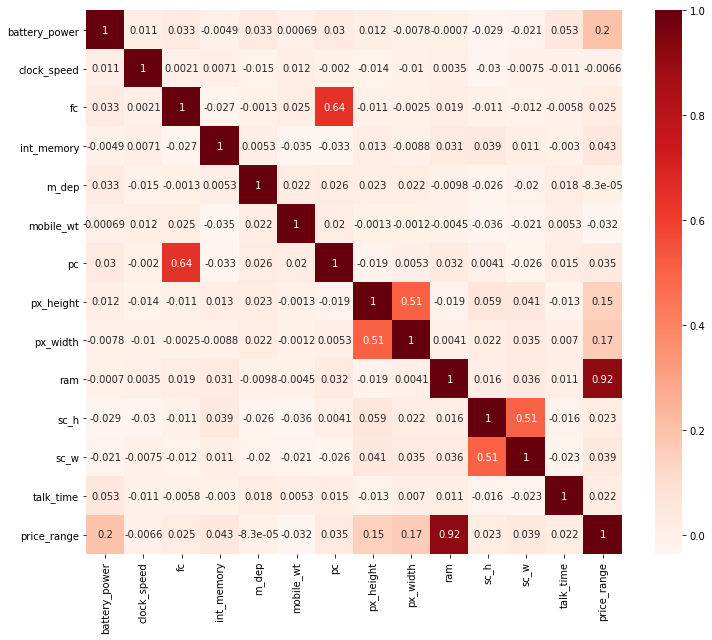

In [267]:
plt.figure(figsize=(12,10))
cor = df[numerical+['price_range']].corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [268]:
numerical_new = ['ram','battery_power','px_width']

In [207]:
remove_list2 = ['clock_speed', 'fc', 'int_memory', 'm_dep', 'mobile_wt', 'pc', 'px_height', 
                 'sc_h', 'sc_w', 'talk_time', 'price_range']

In [208]:
df.drop(columns=remove_list2, inplace=True)

In [209]:
df.head().T

,0,1,2,3,4
battery_power,842,1021,563,615,1821
px_width,756,1988,1716,1786,1212
ram,2549,2631,2603,2769,1411
n_cores_touch_screen,Two_False,Three_True,Five_True,Six_False,Two_True
n_cores_four_g,Two_False,Three_True,Five_True,Six_False,Two_True
n_cores_blue,Two_False,Three_True,Five_True,Six_True,Two_True
n_cores_three_g,Two_False,Three_True,Five_True,Six_True,Two_True


In [269]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 31 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   battery_power         2000 non-null   int64  
 1   blue                  2000 non-null   object 
 2   clock_speed           2000 non-null   float64
 3   dual_sim              2000 non-null   object 
 4   fc                    2000 non-null   float64
 5   four_g                2000 non-null   object 
 6   int_memory            2000 non-null   float64
 7   m_dep                 2000 non-null   float64
 8   mobile_wt             2000 non-null   float64
 9   n_cores               2000 non-null   object 
 10  pc                    2000 non-null   float64
 11  px_height             2000 non-null   float64
 12  px_width              2000 non-null   float64
 13  ram                   2000 non-null   float64
 14  sc_h                  2000 non-null   float64
 15  sc_w                 

In [279]:
df.describe()

,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,price_range
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,1.522250,4.310276,32.048120,0.502256,140.266533,9.915789,644.651804,1251.287788,2124.262262,12.303652,5.766383,11.011000,1.500000
std,439.418206,0.816004,4.330340,18.123767,0.288169,35.349256,6.050887,442.911643,432.136592,1084.730328,4.211319,4.356310,5.463955,1.118314
min,501.000000,0.500000,0.000000,2.000000,0.100000,80.000000,0.000000,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000
25%,851.750000,0.700000,1.000000,16.000000,0.200000,109.000000,5.000000,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,0.750000
50%,1226.000000,1.500000,3.000000,32.000000,0.500000,141.000000,10.000000,568.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.500000
75%,1615.250000,2.200000,7.000000,48.000000,0.800000,170.000000,15.000000,946.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,2.250000
max,1998.000000,3.000000,19.000000,64.000000,1.000000,200.000000,20.000000,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,3.000000


One-hot encoding for categorical variables

In [385]:
dv,df_mat = Handle_Categorical_Variables(df,categorical_new,numerical_new)

In [386]:
d = decimal.Decimal('1.1')
df_mat = np.array(df_mat,dtype=numpy.dtype(decimal.Decimal))
type(df_mat)
print(df_mat[0])

[842.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0
 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0
 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0
 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 756.0 2549.0]


In [387]:
# show the names of all columns
dv.get_feature_names()

['battery_power',
 'n_cores_blue=Eight_False',
 'n_cores_blue=Eight_True',
 'n_cores_blue=Five_False',
 'n_cores_blue=Five_True',
 'n_cores_blue=Four_False',
 'n_cores_blue=Four_True',
 'n_cores_blue=One_False',
 'n_cores_blue=One_True',
 'n_cores_blue=Seven_False',
 'n_cores_blue=Seven_True',
 'n_cores_blue=Six_False',
 'n_cores_blue=Six_True',
 'n_cores_blue=Three_False',
 'n_cores_blue=Three_True',
 'n_cores_blue=Two_False',
 'n_cores_blue=Two_True',
 'n_cores_four_g=Eight_False',
 'n_cores_four_g=Eight_True',
 'n_cores_four_g=Five_False',
 'n_cores_four_g=Five_True',
 'n_cores_four_g=Four_False',
 'n_cores_four_g=Four_True',
 'n_cores_four_g=One_False',
 'n_cores_four_g=One_True',
 'n_cores_four_g=Seven_False',
 'n_cores_four_g=Seven_True',
 'n_cores_four_g=Six_False',
 'n_cores_four_g=Six_True',
 'n_cores_four_g=Three_False',
 'n_cores_four_g=Three_True',
 'n_cores_four_g=Two_False',
 'n_cores_four_g=Two_True',
 'n_cores_three_g=Eight_False',
 'n_cores_three_g=Eight_True',
 'n_cor

In [ ]:
# feature_lists=['n_cores_touch_screen','n_cores_four_g','n_cores_blue','n_cores_three_g',
#               'ram','battery_power','px_width']

# 2.Build Model

Build ML model, to classify the price for any device

Create Features and Labels from Dataframe

In [450]:
# X-> features , Y -> Labels
Y = df['price_range']
X = df_mat

Splitting Data into Train , Validation and Test

In [451]:
Train_Val_X, Test_X, Train_Val_Y, Test_Y=train_test_split(np.array(X),np.array(Y),test_size=0.2,random_state=1)

In [455]:
def Tune_Hyper_Parameters(val_X,val_Y):
    model = KNeighborsClassifier()
# Hyper parameters
    param=[{'n_neighbors' : [5,7,9,11,13,15],'metric' : ['minkowski','euclidean','manhattan']}]
# use GridSearch
    clf_GS = GridSearchCV(model, param)
    clf_GS.fit(val_X,val_Y)
    
    print('Best Score : ',clf_GS.best_score_)
    print('Best Param : ',clf_GS.best_params_)
# get the best hyper parameter
    param=clf_GS.best_params_
    acc=clf_GS.best_score_
    model=clf_GS.best_estimator_
    
    return param,acc,model

In [456]:
def KFold_Cross_Validation_With_Tune_Param(train_Val_X,train_Val_Y):
    Val_list=[]
    Train_list=[]
    auc_list=[]
    params_list=[]
    acc_list=[]
    for i, (train_indx, val_indx) in enumerate(kfold.split(train_Val_X)):
        print(f"Fold {i}:")

        train_X = train_Val_X[train_indx]
        val_X = train_Val_X[val_indx]

        train_Y = train_Val_Y[train_indx]
        val_Y = train_Val_Y[val_indx]
    
        param,acc,model = Tune_Hyper_Parameters(val_X,val_Y) 
        

        acc_list.append(acc)
        Val_list.append(val_indx)
        Train_list.append(train_indx)
        params_list.append([param])

    indx=np.argmax(acc_list)
    Best_Train_X=train_Val_X[Train_list[indx]]
    Best_Train_Y=train_Val_Y[[Train_list[indx]]]

    Best_Val_X=train_Val_X[[Val_list[indx]]]
    Best_Val_Y=train_Val_Y[[Val_list[indx]]]
    
    Best_Params=params_list[indx] 
                           
    return Best_Train_X,Best_Train_Y,Best_Val_X,Best_Val_Y,Best_Params

In [457]:
kfold = KFold(n_splits=10,shuffle=True,random_state=1)

In [458]:
Best_Train_X,Best_Train_Y,Best_Val_X,Best_Val_Y,Best_Params=KFold_Cross_Validation_With_Tune_Param(Train_Val_X,Train_Val_Y)

Fold 0:
Best Score :  0.89375
Best Param :  {'metric': 'manhattan', 'n_neighbors': 5}
Fold 1:
Best Score :  0.9
Best Param :  {'metric': 'minkowski', 'n_neighbors': 7}
Fold 2:
Best Score :  0.875
Best Param :  {'metric': 'minkowski', 'n_neighbors': 11}
Fold 3:
Best Score :  0.85
Best Param :  {'metric': 'minkowski', 'n_neighbors': 5}
Fold 4:
Best Score :  0.85
Best Param :  {'metric': 'minkowski', 'n_neighbors': 11}
Fold 5:
Best Score :  0.86875
Best Param :  {'metric': 'minkowski', 'n_neighbors': 11}
Fold 6:
Best Score :  0.875
Best Param :  {'metric': 'minkowski', 'n_neighbors': 15}
Fold 7:
Best Score :  0.85
Best Param :  {'metric': 'minkowski', 'n_neighbors': 15}
Fold 8:
Best Score :  0.86875
Best Param :  {'metric': 'minkowski', 'n_neighbors': 11}
Fold 9:
Best Score :  0.8375
Best Param :  {'metric': 'manhattan', 'n_neighbors': 5}


E:\Anaconda\lib\site-packages\ipykernel_launcher.py:26: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
E:\Anaconda\lib\site-packages\ipykernel_launcher.py:28: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
E:\Anaconda\lib\site-packages\ipykernel_launcher.py:29: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.


In [459]:
metric,n_neighbors=Best_Params[0].values()

In [460]:
model = KNeighborsClassifier(metric=metric,n_neighbors=n_neighbors)
model.fit(Best_Train_X,Best_Train_Y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                     weights='uniform')

In [461]:
Best_pred_Y = model.predict(Test_X)
Best_pred_Y

array([0, 0, 1, 0, 3, 2, 0, 2, 2, 3, 0, 3, 1, 1, 3, 0, 0, 1, 1, 1, 3, 3,
       1, 2, 3, 2, 2, 2, 2, 2, 2, 1, 2, 0, 3, 3, 0, 0, 0, 0, 1, 1, 3, 1,
       0, 1, 2, 2, 1, 2, 1, 3, 1, 3, 1, 3, 1, 3, 3, 1, 0, 2, 1, 3, 2, 1,
       0, 2, 3, 2, 1, 2, 0, 3, 3, 1, 2, 1, 1, 0, 0, 3, 1, 2, 3, 2, 2, 0,
       1, 1, 3, 0, 1, 1, 2, 3, 3, 0, 2, 3, 3, 3, 0, 1, 2, 0, 1, 1, 0, 2,
       0, 3, 1, 1, 2, 2, 3, 1, 2, 1, 2, 0, 0, 0, 3, 0, 0, 1, 0, 1, 0, 3,
       0, 3, 3, 0, 3, 2, 2, 1, 0, 0, 3, 1, 1, 2, 0, 0, 0, 1, 2, 3, 1, 1,
       0, 2, 1, 0, 3, 2, 3, 1, 3, 2, 3, 1, 2, 1, 3, 2, 2, 0, 2, 2, 0, 3,
       3, 0, 1, 2, 0, 3, 0, 0, 2, 3, 3, 1, 2, 1, 2, 2, 2, 3, 0, 1, 1, 3,
       3, 1, 3, 2, 0, 1, 2, 2, 1, 1, 0, 2, 0, 2, 1, 0, 2, 0, 2, 0, 2, 1,
       0, 1, 2, 1, 3, 3, 0, 3, 2, 1, 0, 2, 3, 3, 2, 1, 0, 1, 2, 2, 3, 2,
       2, 1, 0, 1, 2, 0, 3, 3, 3, 1, 2, 1, 0, 1, 1, 3, 2, 0, 3, 1, 1, 1,
       2, 1, 2, 0, 3, 2, 2, 0, 0, 1, 3, 3, 0, 1, 0, 2, 3, 2, 2, 2, 2, 0,
       0, 3, 0, 0, 1, 3, 2, 3, 0, 0, 2, 3, 3, 2, 2,

# 3.Evaluate Model

Show some evaluation metrics

In [463]:
score=round(accuracy_score(Best_pred_Y,Test_Y)*100,3)
print("Best Model Accuracy: ",( score ),"%")

Best Model Accuracy:  89.75 %


In [464]:
print(confusion_matrix(Best_pred_Y,Test_Y) )

[[88  5  0  0]
 [ 4 86  7  0]
 [ 0  5 93 14]
 [ 0  0  6 92]]


In [465]:
print(classification_report(Best_pred_Y, Test_Y))

              precision    recall  f1-score   support

           0       0.96      0.95      0.95        93
           1       0.90      0.89      0.89        97
           2       0.88      0.83      0.85       112
           3       0.87      0.94      0.90        98

    accuracy                           0.90       400
   macro avg       0.90      0.90      0.90       400
weighted avg       0.90      0.90      0.90       400



# 4.Optimize Model

Hyperparameter Tuning: Hyperparameters are parameters that are not learned by the model but need to be set before training. Optimizing these hyperparameters using techniques like grid search or random search can greatly enhance the model’s performance.

# 5.Endpoints

RESTful API to predict the price for any device:

    Will take the specs for any device, and send it to ML model, then return the predicted price.

# SpringBoot project

Contain a simple entity, and a few endpoints, to call the service from the Python project for a bunch of test cases, and store them

# 1.Project Entities

Device: to describe every device in our system.

# 2.EndPoints

Implement RESTful endpoints to handle the following operations:

        ● POST /api/devices/: Retrieve a list of all devices
        ● GET /api/devices/{id}: Retrieve details of a specific device by ID.
        ● POST /api/devices: Add a new device.
        ● POST /api/predict/{deviceId}
        
○ This will call the Python API to predict the price, and save the result in the device entity here.                             
○ Apply some best practices here, like transaction management.

# 3.Testing

Do prediction for 10 devices from the Test dataset above.

# 4.DataStorage

Choose any kind of Database.